Відстані від вершини A до всіх інших:
{'A': 0, 'B': 1, 'C': 3, 'D': 4}


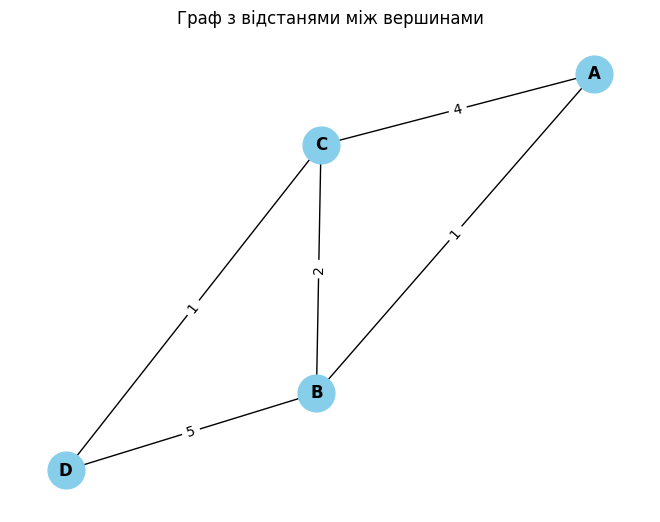

In [1]:
import heapq
import matplotlib.pyplot as plt
import networkx as nx

def dijkstra(graph, start):
    distances = {vertex: float('infinity') for vertex in graph}
    distances[start] = 0

    heap = [(0, start)]
    while heap:
        current_distance, current_vertex = heapq.heappop(heap)

        if current_distance > distances[current_vertex]:
            continue

        for neighbor, weight in graph[current_vertex].items():
            distance = current_distance + weight

            if distance < distances[neighbor]:
                distances[neighbor] = distance
                heapq.heappush(heap, (distance, neighbor))

    return distances

# Функція для візуалізації графа
def visualize_graph(graph):
    G = nx.Graph()
    for vertex in graph:
        G.add_node(vertex)
        for neighbor, weight in graph[vertex].items():
            G.add_edge(vertex, neighbor, weight=weight)

    pos = nx.spring_layout(G)  # Встановлюємо позиції вершин
    labels = nx.get_edge_attributes(G, 'weight')

    nx.draw(G, pos, with_labels=True, node_size=700, node_color='skyblue', font_size=12, font_weight='bold')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

    plt.title('Граф з відстанями між вершинами')
    plt.show()

# Приклад використання
graph = {
    'A': {'B': 1, 'C': 4},
    'B': {'A': 1, 'C': 2, 'D': 5},
    'C': {'A': 4, 'B': 2, 'D': 1},
    'D': {'B': 5, 'C': 1}
}
start_vertex = 'A'
distances = dijkstra(graph, start_vertex)

print("Відстані від вершини {} до всіх інших:".format(start_vertex))
print(distances)

visualize_graph(graph)
